In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

In [2]:
res = pd.read_csv("D:\\Project\\Restaurant.csv")
res_halal = pd.read_csv("D:\\Project\\Restaurant_Halal.csv")
res_nv = pd.read_csv("D:\\Project\\Restaurant_NV.csv")
res_nv_halal = pd.read_csv("D:\\Project\\Restaurant_Halal_NV.csv")

In [22]:
data_df = pd.read_csv("D:\\Project\\Res_Nev_Halal_Final.csv")

In [4]:
res.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,IL,61820,40.110446,-88.233073,4.5,5,1,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Ethnic Food, Food Trucks, Specialty Food, Impo...","{'Monday': '11:30-14:30', 'Tuesday': '11:30-14..."
1,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,44.010962,-79.448677,4.5,4,1,"{'RestaurantsTableService': 'False', 'Restaura...","Restaurants, Cheesesteaks, Poutineries","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
2,9sRGfSVEfLhN_km60YruTA,Apadana Restaurant,13071 Yonge Street,Richmond Hill,ON,L4E 1A5,43.947011,-79.454862,3.0,3,1,"{'Ambience': ""{'touristy': False, 'hipster': F...","Persian/Iranian, Turkish, Middle Eastern, Rest...","{'Tuesday': '12:0-21:0', 'Wednesday': '12:0-21..."
3,vjTVxnsQEZ34XjYNS-XUpA,Wetzel's Pretzels,"4550 East Cactus Rd, #KSFC-4",Phoenix,AZ,85032,33.602822,-111.983533,4.0,10,1,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...","Food, Pretzels, Bakeries, Fast Food, Restaurants","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'..."
4,98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,"{'BusinessParking': 'None', 'Ambience': ""{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:..."


In [5]:
res_halal.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,RrapAhd8ZxCj-iue7fu9FA,Ganga Restaurant,515 4th Avenue SW,Calgary,AB,T2P 0J8,51.049407,-114.072656,1.5,3,1,"{'RestaurantsReservations': 'True', 'WiFi': ""u...","Restaurants, Buffets, Indian, Halal","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'..."
1,ebwM2pckHieHvK6h1scuBw,Lazeez Mediterranean Grill,9311 Jw Clay Blvd,Charlotte,NC,28262,35.311397,-80.746334,3.5,124,0,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Restaurants, Mediterranean, Halal, Cocktail Ba...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
2,QHRF1RvAmZIbnXWK_fCPcQ,Pita Land,"30 Eglinton Ave W, Unit #12B",Mississauga,ON,L5R 3E7,43.605623,-79.652680,3.5,15,1,"{'RestaurantsPriceRange2': '2', 'BusinessParki...","Sandwiches, Halal, Restaurants, Middle Eastern...","{'Monday': '11:0-1:0', 'Tuesday': '11:0-1:0', ..."
3,9j4nk2WOT6XCDRgX-lGzVA,Fritou Chicken,3-1110 Canterbury Drive SW,Calgary,AB,T2W 3P5,50.936935,-114.080591,3.5,6,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsPri...","Donairs, Restaurants, Halal, Food, Chicken Sho...","{'Monday': '12:0-22:0', 'Tuesday': '12:0-22:0'..."
4,eRZuxjnaMviiVyvhejwTBQ,Afghan Cuisine,"10909 Yonge Street, Unit 52",Richmond Hill,ON,L4C 4M6,43.893131,-79.440487,3.0,29,1,"{'GoodForMeal': ""{'dessert': False, 'latenight...","Restaurants, Specialty Food, Afghan, Food, Eth...","{'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ..."


In [6]:
res_halal['business_id'].value_counts()

k7OW_5WyhQFgrj0J_uMjTQ    1
nD3FyISCri8uLP0NJY5CZA    1
Yh-3IjAFCgq1Ubtdo9TDcw    1
kljR-Bg6A3jze9JzBwRhRA    1
PGde9ygfV_a5oLQDNVedJg    1
                         ..
bZUbsROklEz4bWSN3ej4dA    1
uJFEQEjsG2NwxjEGpKaYBw    1
vZZhoNKMaGSga_7l4Secew    1
5Jf-9U16kMW-o2k8OUvTLg    1
tnd0GWjSEntWbG6wpLu61g    1
Name: business_id, Length: 636, dtype: int64

In [7]:
res_nv.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,fhNf_sg-XzZ3e7HEVGuOZg,Meat Chix And Wieners,6530 S Decatur Blvd,Las Vegas,NV,89118.0,36.071196,-115.207463,3.0,10,0,"{'RestaurantsPriceRange2': '2', 'BusinessParki...","Burgers, Restaurants, American (Traditional), ...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
1,OWkS1FXNJbozn-qPg3LWxg,Mama Napoli Pizza,NaN,Las Vegas,NV,89109.0,36.128561,-115.171130,4.5,11,1,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Food, Food Trucks, Restaurants, Pizza",{'Friday': '18:0-0:0'}
2,Q_dh08clYUPj13GmCRzIVA,Kulinarya Express Filipino Kitchen,"7960 S Rainbow Blvd, Ste 8000A",Las Vegas,NV,89139.0,36.043663,-115.241881,4.0,82,0,"{'BusinessParking': ""{'garage': False, 'street...","Filipino, Restaurants, Breakfast & Brunch, Foo...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-20:0', ..."
3,Yr_w9lakJrKMyEG_hI6zbA,Fat Moe's Pizza & Wings,"6125 W Tropicana Ave, Ste F",Las Vegas,NV,89103.0,36.099361,-115.226636,4.0,141,1,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Pizza, Salad, Burgers, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
4,AN0bWhisCf6LN9eHZ7DQ3w,Los Olivos Ristorante,3759 E Desert Inn Rd,Las Vegas,NV,89121.0,36.129178,-115.092483,5.0,222,1,"{'WiFi': ""u'free'"", 'RestaurantsPriceRange2': ...","Restaurants, Italian","{'Monday': '0:0-0:0', 'Tuesday': '16:0-21:0', ..."


In [8]:
res_nv_halal.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,EfAqol3tWckyNrBMIooJmg,Kabob N More,3049 S Las Vegas Blvd,Las Vegas,NV,89109,36.131754,-115.164273,3.5,368,1,"{'NoiseLevel': ""'quiet'"", 'RestaurantsReservat...","Restaurants, Arabian, Halal, Pakistani, Indian","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ..."
1,MhXKEz4S3ECAESIoDrOnBw,The Halal Guys,"3377 S Las Vegas Blvd, Ste 2258",Las Vegas,NV,89109,36.122016,-115.169650,3.5,40,1,"{'GoodForMeal': ""{'dessert': False, 'latenight...","Restaurants, Falafel, Mediterranean, Middle Ea...","{'Monday': '10:0-23:0', 'Tuesday': '10:0-23:0'..."
2,K3wUWHOPhAmIJ5naMVzylA,Flame Kabob,"1405 E Sunset Rd, Ste 130",Las Vegas,NV,89119,36.071228,-115.134212,3.5,54,0,"{'OutdoorSeating': 'True', 'GoodForKids': 'Tru...","Restaurants, Persian/Iranian, Halal, Mediterra...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
3,5O7qB4gNmr3NgdYAuYbP4Q,Indian Curry House,"5115 Spring Mountain Rd, Unit 234",Las Vegas,NV,89146,36.125693,-115.211278,4.0,82,0,"{'RestaurantsAttire': ""u'casual'"", 'BusinessAc...","Pakistani, Restaurants, Himalayan/Nepalese, In...","{'Monday': '17:0-22:30', 'Tuesday': '17:0-22:3..."
4,jXyy2Vc-Dgp7QguQJSfnXw,Lazeez,"8560 W Desert Inn Rd, Ste D-3",Las Vegas,NV,89117,36.130041,-115.277785,4.0,374,1,"{'RestaurantsPriceRange2': '2', 'GoodForKids':...","Indian, Halal, Mediterranean, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."


In [23]:
data_df.head()

,review_id,user_id,business_id,text,name,city,state,longitude,latitude,rating,categories
0,kCkyGrMMRQbqx69dgzmnEA,I143qmTjREqTwAVWVsB6sw,EfAqol3tWckyNrBMIooJmg,From take out box right to the trash can. I've...,Kabob N More,Las Vegas,NV,-115.164273,36.131754,3.5,"Restaurants, Arabian, Halal, Pakistani, Indian"
1,JJUHx7FNoWnBYsIbEoBopw,GOGAWajma1T-dPZn8xls6A,EfAqol3tWckyNrBMIooJmg,First of all the owner needs to take a chill p...,Kabob N More,Las Vegas,NV,-115.164273,36.131754,3.5,"Restaurants, Arabian, Halal, Pakistani, Indian"
2,4wUnRF4-DistlPJnUwU-Uw,X40NV4DapcQBiYiPMwQkOw,EfAqol3tWckyNrBMIooJmg,It was 108 degrees outside and the AC wasn't w...,Kabob N More,Las Vegas,NV,-115.164273,36.131754,3.5,"Restaurants, Arabian, Halal, Pakistani, Indian"
3,L94lNIuNw3G1UaXgxAgTWg,sPr42M6_rRkKJXNepmfm1A,EfAqol3tWckyNrBMIooJmg,Amazing service and really good Chai tea! If y...,Kabob N More,Las Vegas,NV,-115.164273,36.131754,3.5,"Restaurants, Arabian, Halal, Pakistani, Indian"
4,SGaOzRxoEuiGBdSCWUJ8fQ,ykmEwulkVsiEesovrrpVSA,EfAqol3tWckyNrBMIooJmg,I'm assuming it was the owner but he got up in...,Kabob N More,Las Vegas,NV,-115.164273,36.131754,3.5,"Restaurants, Arabian, Halal, Pakistani, Indian"


In [24]:
data_df['city'].unique()

array(['Las Vegas', 'Henderson'], dtype=object)

In [11]:
res['state'].value_counts()

ON    12090
AZ     9821
NV     6726
OH     4716
QC     4552
NC     3807
PA     3400
AB     2455
WI     1486
IL      529
SC      336
NY       10
TX        4
CA        2
CO        2
BC        2
FL        1
OR        1
VT        1
HI        1
AR        1
NE        1
VA        1
MB        1
WA        1
Name: state, dtype: int64

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Jumlah Restaurant di setiap Negara Bagian di Amerika')

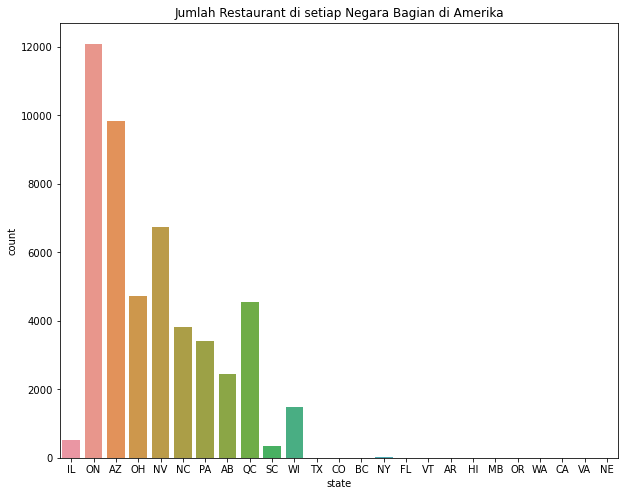

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(res['state'])
plt.title('Jumlah Restaurant di setiap Negara Bagian di Amerika')

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Jumlah Restaurant Halal di setiap Negara Bagian di Amerika')

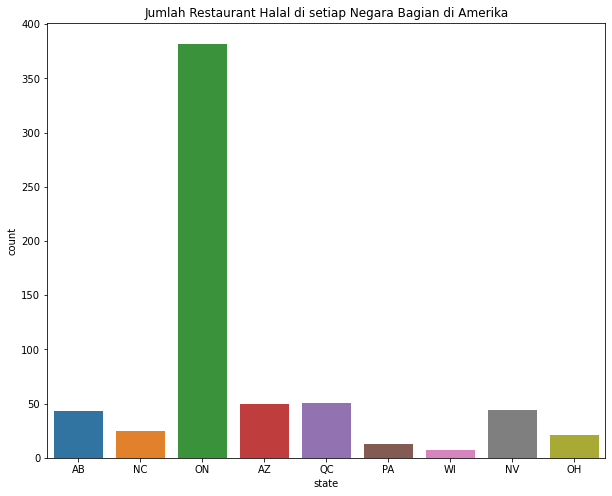

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(res_halal['state'])
plt.title('Jumlah Restaurant Halal di setiap Negara Bagian di Amerika')

In [14]:
res_nv['city'] = res_nv['city'].replace(
    ('Las  Vegas', 'LAS VEGAS', 'Las Vegas, Nevada', 'Las Vegas Nevada', '110 Las Vegas', 'Las vegas', 'La Vegas', 'Las Vegas NV', 'Las Vegass'),
    'Las Vegas'
)
res_nv['city'] = res_nv['city'].replace(
    ('N Las Vegas', 'N. Las Vegas', 'N.Las Vegas'),
    'North Las Vegas'
)
res_nv['city'] = res_nv['city'].replace(
    ('Nellis AFB', 'NELLIS AIR FORCE BASE', 'NELLIS AFB'),
    'Nellis Air Force Base'
)

In [15]:
res_nv['city'].value_counts()

Las Vegas                5578
Henderson                 773
North Las Vegas           309
Boulder City               45
Nellis Air Force Base       5
Spring Valley               3
Summerlin                   2
Paradise                    2
Blue Diamond                2
Enterprise                  2
South Las Vegas             1
San Antonio                 1
4321 W Flamingo Rd          1
Sunrise Manor               1
Pahrump                     1
Name: city, dtype: int64

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Jumlah Restaurant di Nevada')

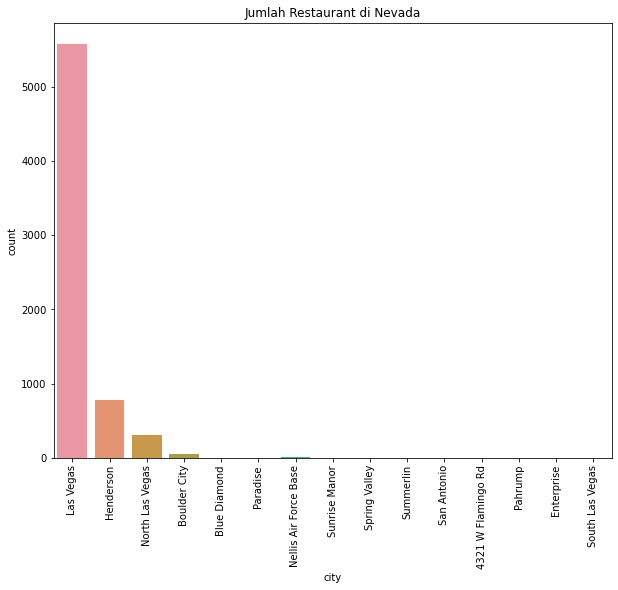

In [16]:
plt.figure(figsize=(10,8))
sns.countplot(res_nv['city'])
plt.xticks(rotation=90)
plt.title('Jumlah Restaurant di Nevada')

In [17]:
res_nv_halal['city'] = res_nv_halal['city'].replace(
    ('Las  Vegas', 'LAS VEGAS', 'Las Vegas, Nevada', 'Las Vegas Nevada', '110 Las Vegas', 'Las vegas', 'La Vegas', 'Las Vegas NV', 'Las Vegass'),
    'Las Vegas'
)
res_nv_halal['city'] = res_nv_halal['city'].replace(
    ('N Las Vegas', 'N. Las Vegas', 'N.Las Vegas'),
    'North Las Vegas'
)
res_nv_halal['city'] = res_nv_halal['city'].replace(
    ('Nellis AFB', 'NELLIS AIR FORCE BASE'),
    'Nellis Air Force Base'
)

In [18]:
res_nv_halal['city'].value_counts()

Las Vegas    43
Henderson     1
Name: city, dtype: int64

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Jumlah Restaurant Halal di Nevada')

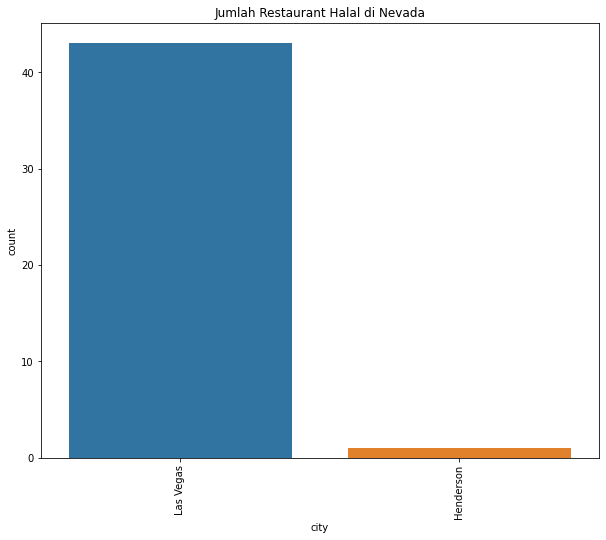

In [19]:
plt.figure(figsize=(10,8))
sns.countplot(res_nv_halal['city'])
plt.xticks(rotation=90)
plt.title('Jumlah Restaurant Halal di Nevada')

In [20]:
data['city'].value_counts()

Las Vegas    11993
Henderson       31
Name: city, dtype: int64

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Jumlah Reviewer Restaurant Halal di Nevada')

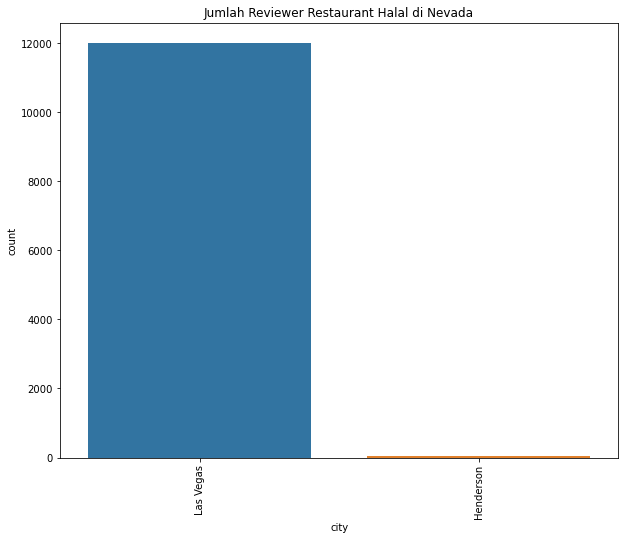

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(data_df['city'])
plt.xticks(rotation=90)
plt.title('Jumlah Reviewer Restaurant Halal di Nevada')

[Text(0, 0, 'UV2Jt8slktGu14gLZeNCjA'),
 Text(0, 0, 'TfabYPasZ1oOMN6JLa-yvw'),
 Text(0, 0, 'OPSNdO3LNPMt7qz1MNb42g'),
 Text(0, 0, '3LWsVfsSmb_Nzbi2YQ-NIA'),
 Text(0, 0, 'auTNigMttjBBTj1MNxOeFQ'),
 Text(0, 0, 'Mn6PbumS7GL2v3jPilTaeg'),
 Text(0, 0, 'fhoFsFK6TqJOEo30LtXeDA'),
 Text(0, 0, 'qTTBJ83d-nWSnQpXyd44gA'),
 Text(0, 0, 'saQQmDQQJ14BVkm_sg53UA'),
 Text(0, 0, 'jXyy2Vc-Dgp7QguQJSfnXw'),
 Text(0, 0, 'EfAqol3tWckyNrBMIooJmg'),
 Text(0, 0, 'kkdm8TM6qTaVnrz5XsG0hQ'),
 Text(0, 0, 'kZspuWnM0Y-Losvk2Rl0lA'),
 Text(0, 0, 'Ssa6XY_RdDRRB9wuVIeIWw'),
 Text(0, 0, 'SFaCcwpIKjrpnT1IjzEDdg'),
 Text(0, 0, '9AnvV8V-UvA_rFhMCr_Dlw'),
 Text(0, 0, 'hV4j36jlyeBwTW_9uQiTjQ'),
 Text(0, 0, 'nS6QENxe6YODNrQ45bpC-A'),
 Text(0, 0, 'udh__7erx4PuM5quw8zuVg'),
 Text(0, 0, 'suFSckaQV8NmND7dytpf4w')]

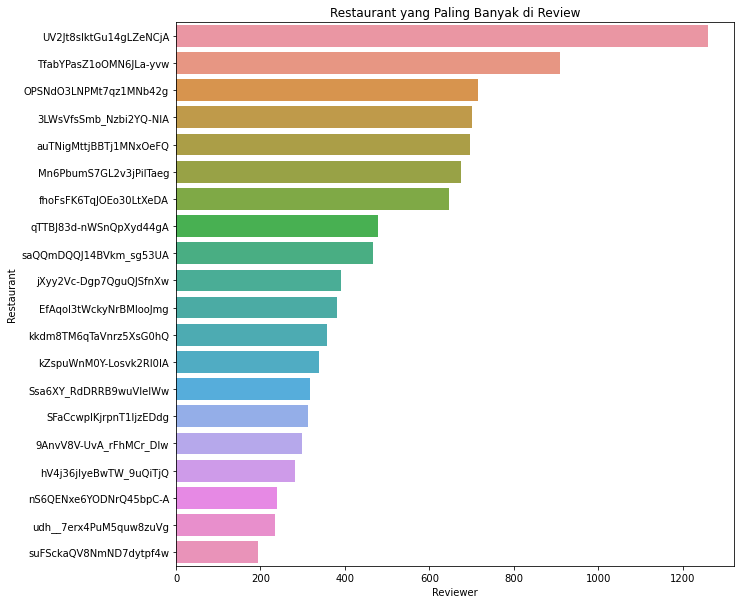

In [57]:
plt.figure(figsize = (10,10))
a = sns.countplot(data=data_df, y='business_id', order = data_df['business_id'].value_counts().iloc[:20].index)
a.set_title('Restaurant yang Paling Banyak di Review')
a.set_xlabel('Reviewer')
a.set_ylabel('Restaurant')
a.set_yticklabels(data_df['business_id'].value_counts().iloc[:20].index)

[Text(0, 0, 'UV2Jt8slktGu14gLZeNCjA'),
 Text(0, 0, 'TfabYPasZ1oOMN6JLa-yvw'),
 Text(0, 0, 'OPSNdO3LNPMt7qz1MNb42g'),
 Text(0, 0, '3LWsVfsSmb_Nzbi2YQ-NIA'),
 Text(0, 0, 'auTNigMttjBBTj1MNxOeFQ'),
 Text(0, 0, 'Mn6PbumS7GL2v3jPilTaeg'),
 Text(0, 0, 'fhoFsFK6TqJOEo30LtXeDA'),
 Text(0, 0, 'qTTBJ83d-nWSnQpXyd44gA'),
 Text(0, 0, 'saQQmDQQJ14BVkm_sg53UA'),
 Text(0, 0, 'jXyy2Vc-Dgp7QguQJSfnXw'),
 Text(0, 0, 'EfAqol3tWckyNrBMIooJmg'),
 Text(0, 0, 'kkdm8TM6qTaVnrz5XsG0hQ'),
 Text(0, 0, 'kZspuWnM0Y-Losvk2Rl0lA'),
 Text(0, 0, 'Ssa6XY_RdDRRB9wuVIeIWw'),
 Text(0, 0, 'SFaCcwpIKjrpnT1IjzEDdg'),
 Text(0, 0, '9AnvV8V-UvA_rFhMCr_Dlw'),
 Text(0, 0, 'hV4j36jlyeBwTW_9uQiTjQ'),
 Text(0, 0, 'udh__7erx4PuM5quw8zuVg'),
 Text(0, 0, 'suFSckaQV8NmND7dytpf4w'),
 Text(0, 0, 'llifBVCFAnr124WdKXmtLg'),
 Text(0, 0, 'gJm6XxUQ7uHlrh8Y8fRiuw'),
 Text(0, 0, '5gv6AqHXfi3gJV4fb432Vw'),
 Text(0, 0, '4yAvytbVKHqSYAo3mkI9OA'),
 Text(0, 0, '4L3VJwVqUareUUIGPE2zcw'),
 Text(0, 0, 'UFn1moo95-PBzi9wWt5FGg'),
 Text(0, 0, 'XVjTeFc18ihr

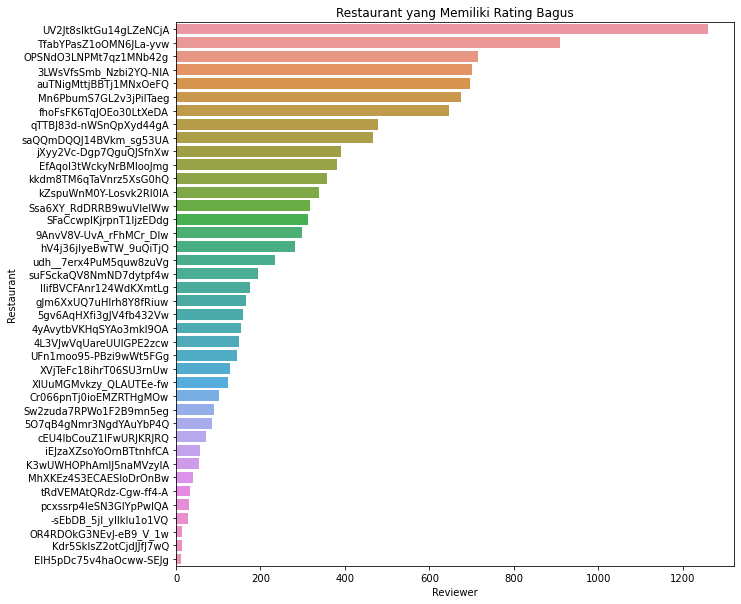

In [56]:
plt.figure(figsize = (10,10))
b = sns.countplot(data=data_df[data_df['rating']>3], y='business_id', order = data_df[data_df['rating']>3]['business_id'].value_counts().iloc[:40].index)
b.set_title('Restaurant yang Memiliki Rating Bagus')
b.set_xlabel('Reviewer')
b.set_ylabel('Restaurant')
b.set_yticklabels(data_df[data_df['rating']>3]['business_id'].value_counts().iloc[:40].index)

In [53]:
print(data_df[data_df['business_id']=='UV2Jt8slktGu14gLZeNCjA']['name'].iloc[0])
print(data_df[data_df['business_id']=='UV2Jt8slktGu14gLZeNCjA']['categories'].iloc[0])
print(data_df[data_df['business_id']=='UV2Jt8slktGu14gLZeNCjA']['rating'].iloc[0])

Mint Indian Bistro
Pakistani, Halal, Himalayan/Nepalese, Vegetarian, Indian, Vegan, Restaurants
4.0


[Text(0, 0, 'nS6QENxe6YODNrQ45bpC-A'),
 Text(0, 0, 'GMBvBDKgOT51xDTpGVphBw'),
 Text(0, 0, 'dFmaYj3_cZpmEaL4WSOkPg'),
 Text(0, 0, 'SLg1Azq0kePm0ZWnIkHhhg'),
 Text(0, 0, 'ARp5inQqiKuDt2E9tIrX2Q'),
 Text(0, 0, 'vbkA2rfPXXorr-27pVB0DQ')]

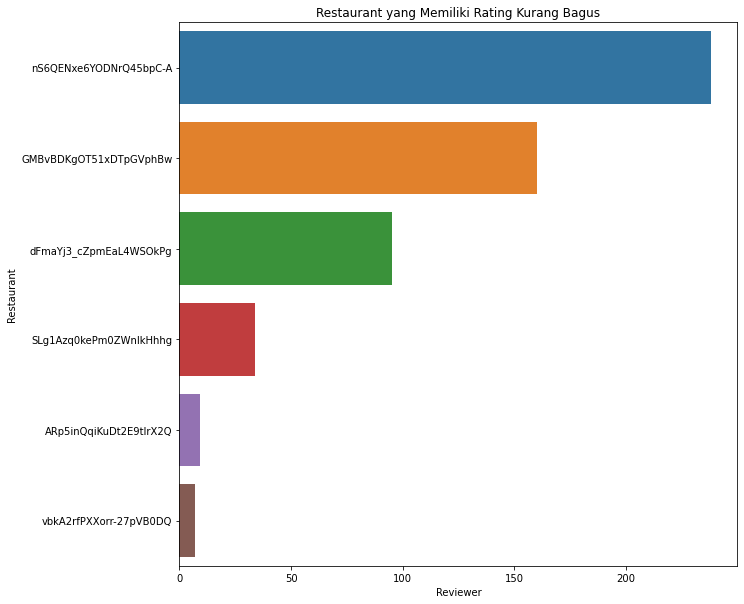

In [58]:
plt.figure(figsize = (10,10))
c = sns.countplot(data=data_df[data_df['rating']<=3], y='business_id', order = data_df[data_df['rating']<=3]['business_id'].value_counts().iloc[:40].index)
c.set_title('Restaurant yang Memiliki Rating Kurang Bagus')
c.set_xlabel('Reviewer')
c.set_ylabel('Restaurant')
c.set_yticklabels(data_df[data_df['rating']<=3]['business_id'].value_counts().iloc[:40].index)

In [54]:
print(data_df[data_df['business_id']=='nS6QENxe6YODNrQ45bpC-A']['name'].iloc[0])
print(data_df[data_df['business_id']=='nS6QENxe6YODNrQ45bpC-A']['categories'].iloc[0])
print(data_df[data_df['business_id']=='nS6QENxe6YODNrQ45bpC-A']['rating'].iloc[0])

Verdi Pizza
Restaurants, Pizza, Cafes, Mediterranean, Halal, Chicken Wings, Italian
3.0


In [59]:
print(data_df[data_df['business_id']=='SLg1Azq0kePm0ZWnIkHhhg']['name'].iloc[0])
print(data_df[data_df['business_id']=='SLg1Azq0kePm0ZWnIkHhhg']['categories'].iloc[0])
print(data_df[data_df['business_id']=='SLg1Azq0kePm0ZWnIkHhhg']['rating'].iloc[0])

Saffron
Pakistani, Restaurants, Halal, Indian
2.0


[Text(0, 0, 'bLbSNkLggFnqwNNzzq-Ijw'),
 Text(0, 0, 'vKsoRog51j2820WF8LV9YA'),
 Text(0, 0, 'qewG3X2O4X6JKskxyyqFwQ'),
 Text(0, 0, 'PKEzKWv_FktMm2mGPjwd0Q'),
 Text(0, 0, 'YE54kKTuqJJPNYWIKIpOEQ'),
 Text(0, 0, '8DEyKVyplnOcSKx39vatbg'),
 Text(0, 0, 'L8P5OWO1Jh4B2HLa1Fnbng'),
 Text(0, 0, 'n86B7IkbU20AkxlFX_5aew'),
 Text(0, 0, 'U1XB9-3lh8Z3Eki6qU-v2g'),
 Text(0, 0, 'EC5nxNCWCmjHg1F14WrlxQ'),
 Text(0, 0, 'z8YU0Vt6Nq3-oJKG48IBnA'),
 Text(0, 0, '1IpKDRkuXAhQDObIlvsJrQ'),
 Text(0, 0, 'uMsCaotR_fqqGWA2v8sC8g'),
 Text(0, 0, '6ZPj5Kp7pftHBxN4KOk8qA'),
 Text(0, 0, 'kwIhn1_cnQeUaLN0CuWWHw'),
 Text(0, 0, 'n9zwrWp8EeB9ODTitKZYsw'),
 Text(0, 0, 'XPNiTbrKL7f0_6L0lrbZlg'),
 Text(0, 0, '1_oU3pAMIRhMlLO8X36x8w'),
 Text(0, 0, '5wT0vDycEzgq95yVCZ60Aw'),
 Text(0, 0, '00Z-tCcJVe9LVP3GakkqDQ')]

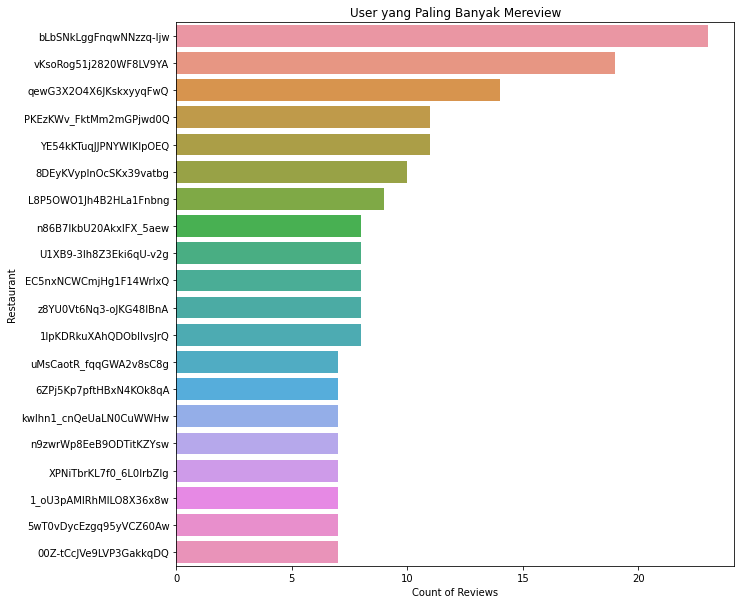

In [48]:
plt.figure(figsize = (10,10))
d = sns.countplot(data=data_df, y='user_id', order = data_df['user_id'].value_counts().iloc[:20].index)
d.set_title('User yang Paling Banyak Mereview')
d.set_xlabel('Count of Reviews')
d.set_ylabel('Restaurant')
d.set_yticklabels(data_df['user_id'].value_counts().iloc[:20].index)

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


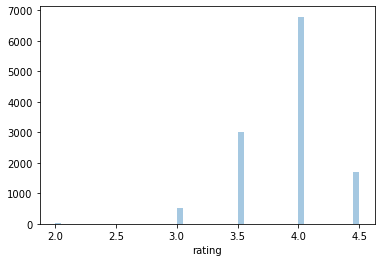

In [49]:
sns.distplot(data_df['rating'], kde=False)

In [60]:
cat=[]
for i in data_df['categories']:
    for j in str(i).split(','):
        cat.append(j)
categories = pd.DataFrame([pd.Series(cat).value_counts().index,pd.Series(cat).value_counts()]).transpose()
categories = categories.rename(columns={0:'categories',1:'count'})

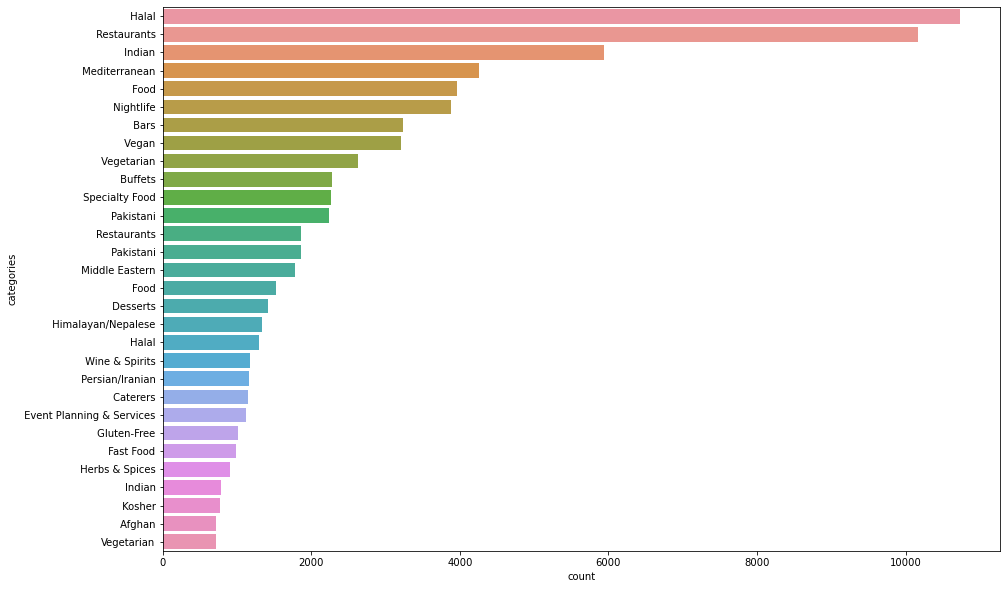

In [62]:
plt.figure(figsize = (15,10))
e = sns.barplot(data=categories.head(30), y='categories', x='count')

## __CLEAN TEXT__

In [64]:
stop_word = []
for i in stopwords.words('english'):
    st = [char for char in i if char not in string.punctuation]
    stop_word.append(''.join(st))

In [71]:
def text_process(mess):
   
    punc = [char for char in mess if char not in string.punctuation]

    punc = ''.join(punc)
    
    return " ".join([word for word in punc.split() if word.lower() not in stop_word])

In [72]:
data_df['text_cleaned'] = data_df['text'].apply(text_process)

> ## Text Blob

In [73]:
data_df['text_polarity'] = data_df['text_cleaned'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [74]:
data_df.head()

,review_id,user_id,business_id,text,name,city,state,longitude,latitude,rating,categories,text_cleaned,text_polarity
0,kCkyGrMMRQbqx69dgzmnEA,I143qmTjREqTwAVWVsB6sw,EfAqol3tWckyNrBMIooJmg,From take out box right to the trash can. I've...,Kabob N More,Las Vegas,NV,-115.164273,36.131754,3.5,"Restaurants, Arabian, Halal, Pakistani, Indian",take box right trash Ive Persian Arminian Turk...,-0.004422
1,JJUHx7FNoWnBYsIbEoBopw,GOGAWajma1T-dPZn8xls6A,EfAqol3tWckyNrBMIooJmg,First of all the owner needs to take a chill p...,Kabob N More,Las Vegas,NV,-115.164273,36.131754,3.5,"Restaurants, Arabian, Halal, Pakistani, Indian",First owner needs take chill pill let customer...,0.066429
2,4wUnRF4-DistlPJnUwU-Uw,X40NV4DapcQBiYiPMwQkOw,EfAqol3tWckyNrBMIooJmg,It was 108 degrees outside and the AC wasn't w...,Kabob N More,Las Vegas,NV,-115.164273,36.131754,3.5,"Restaurants, Arabian, Halal, Pakistani, Indian",108 degrees outside AC working asked owner ext...,-0.250000
3,L94lNIuNw3G1UaXgxAgTWg,sPr42M6_rRkKJXNepmfm1A,EfAqol3tWckyNrBMIooJmg,Amazing service and really good Chai tea! If y...,Kabob N More,Las Vegas,NV,-115.164273,36.131754,3.5,"Restaurants, Arabian, Halal, Pakistani, Indian",Amazing service really good Chai tea check get...,0.312500
4,SGaOzRxoEuiGBdSCWUJ8fQ,ykmEwulkVsiEesovrrpVSA,EfAqol3tWckyNrBMIooJmg,I'm assuming it was the owner but he got up in...,Kabob N More,Las Vegas,NV,-115.164273,36.131754,3.5,"Restaurants, Arabian, Halal, Pakistani, Indian",Im assuming owner got face confrontational ask...,0.101111


In [76]:
count=[]
for i in data_df['text_cleaned']:
    for j in str(i).split():
        count.append(j)
words_count = pd.DataFrame([pd.Series(count).value_counts().index,pd.Series(count).value_counts()]).transpose()
words_count = words_count.rename(columns={0:'words',1:'count'})

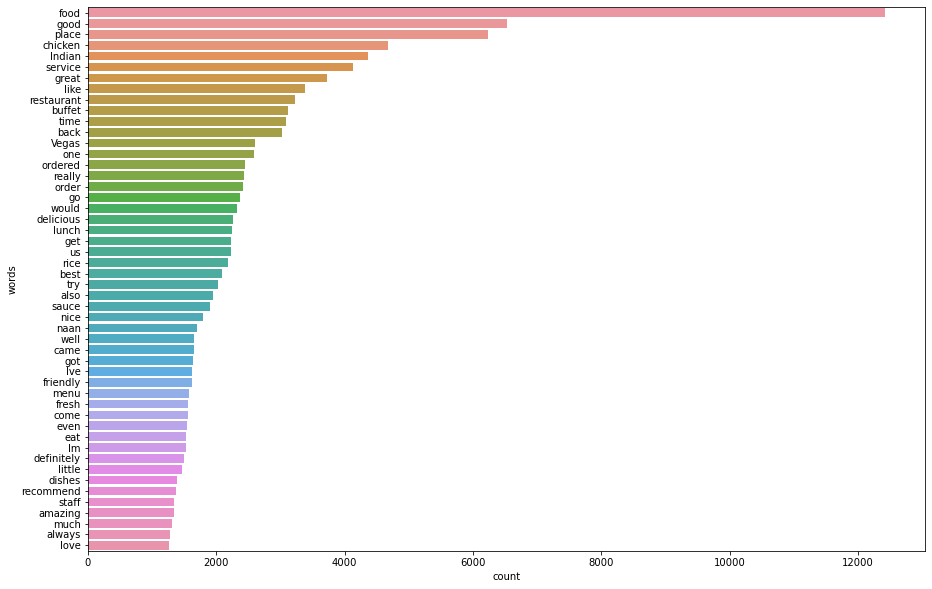

In [78]:
plt.figure(figsize = (15,10))
co = sns.barplot(data=words_count.head(50), y='words', x='count')

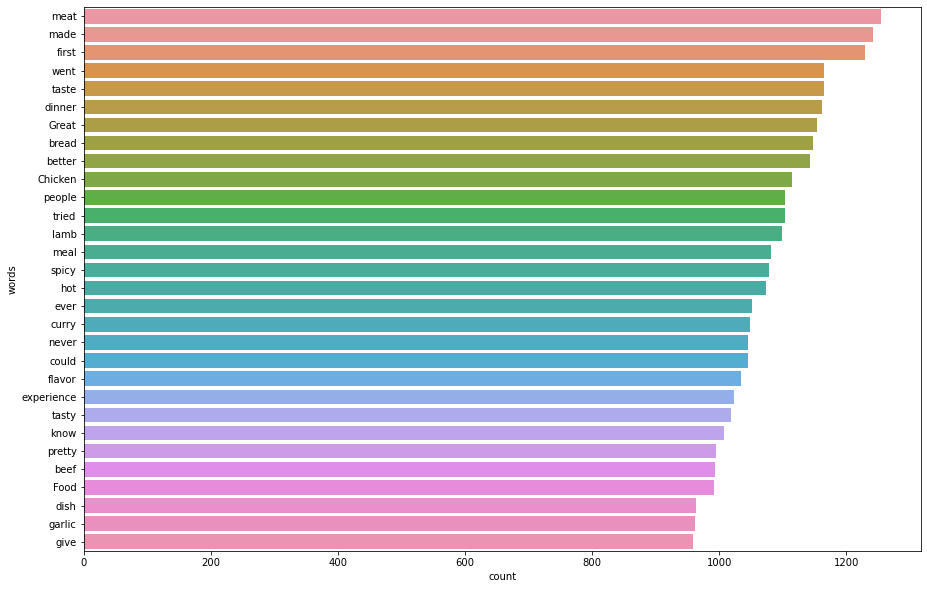

In [79]:
plt.figure(figsize = (15,10))
co1 = sns.barplot(data=words_count[50:80], y='words', x='count')

## __WORD CLOUD__

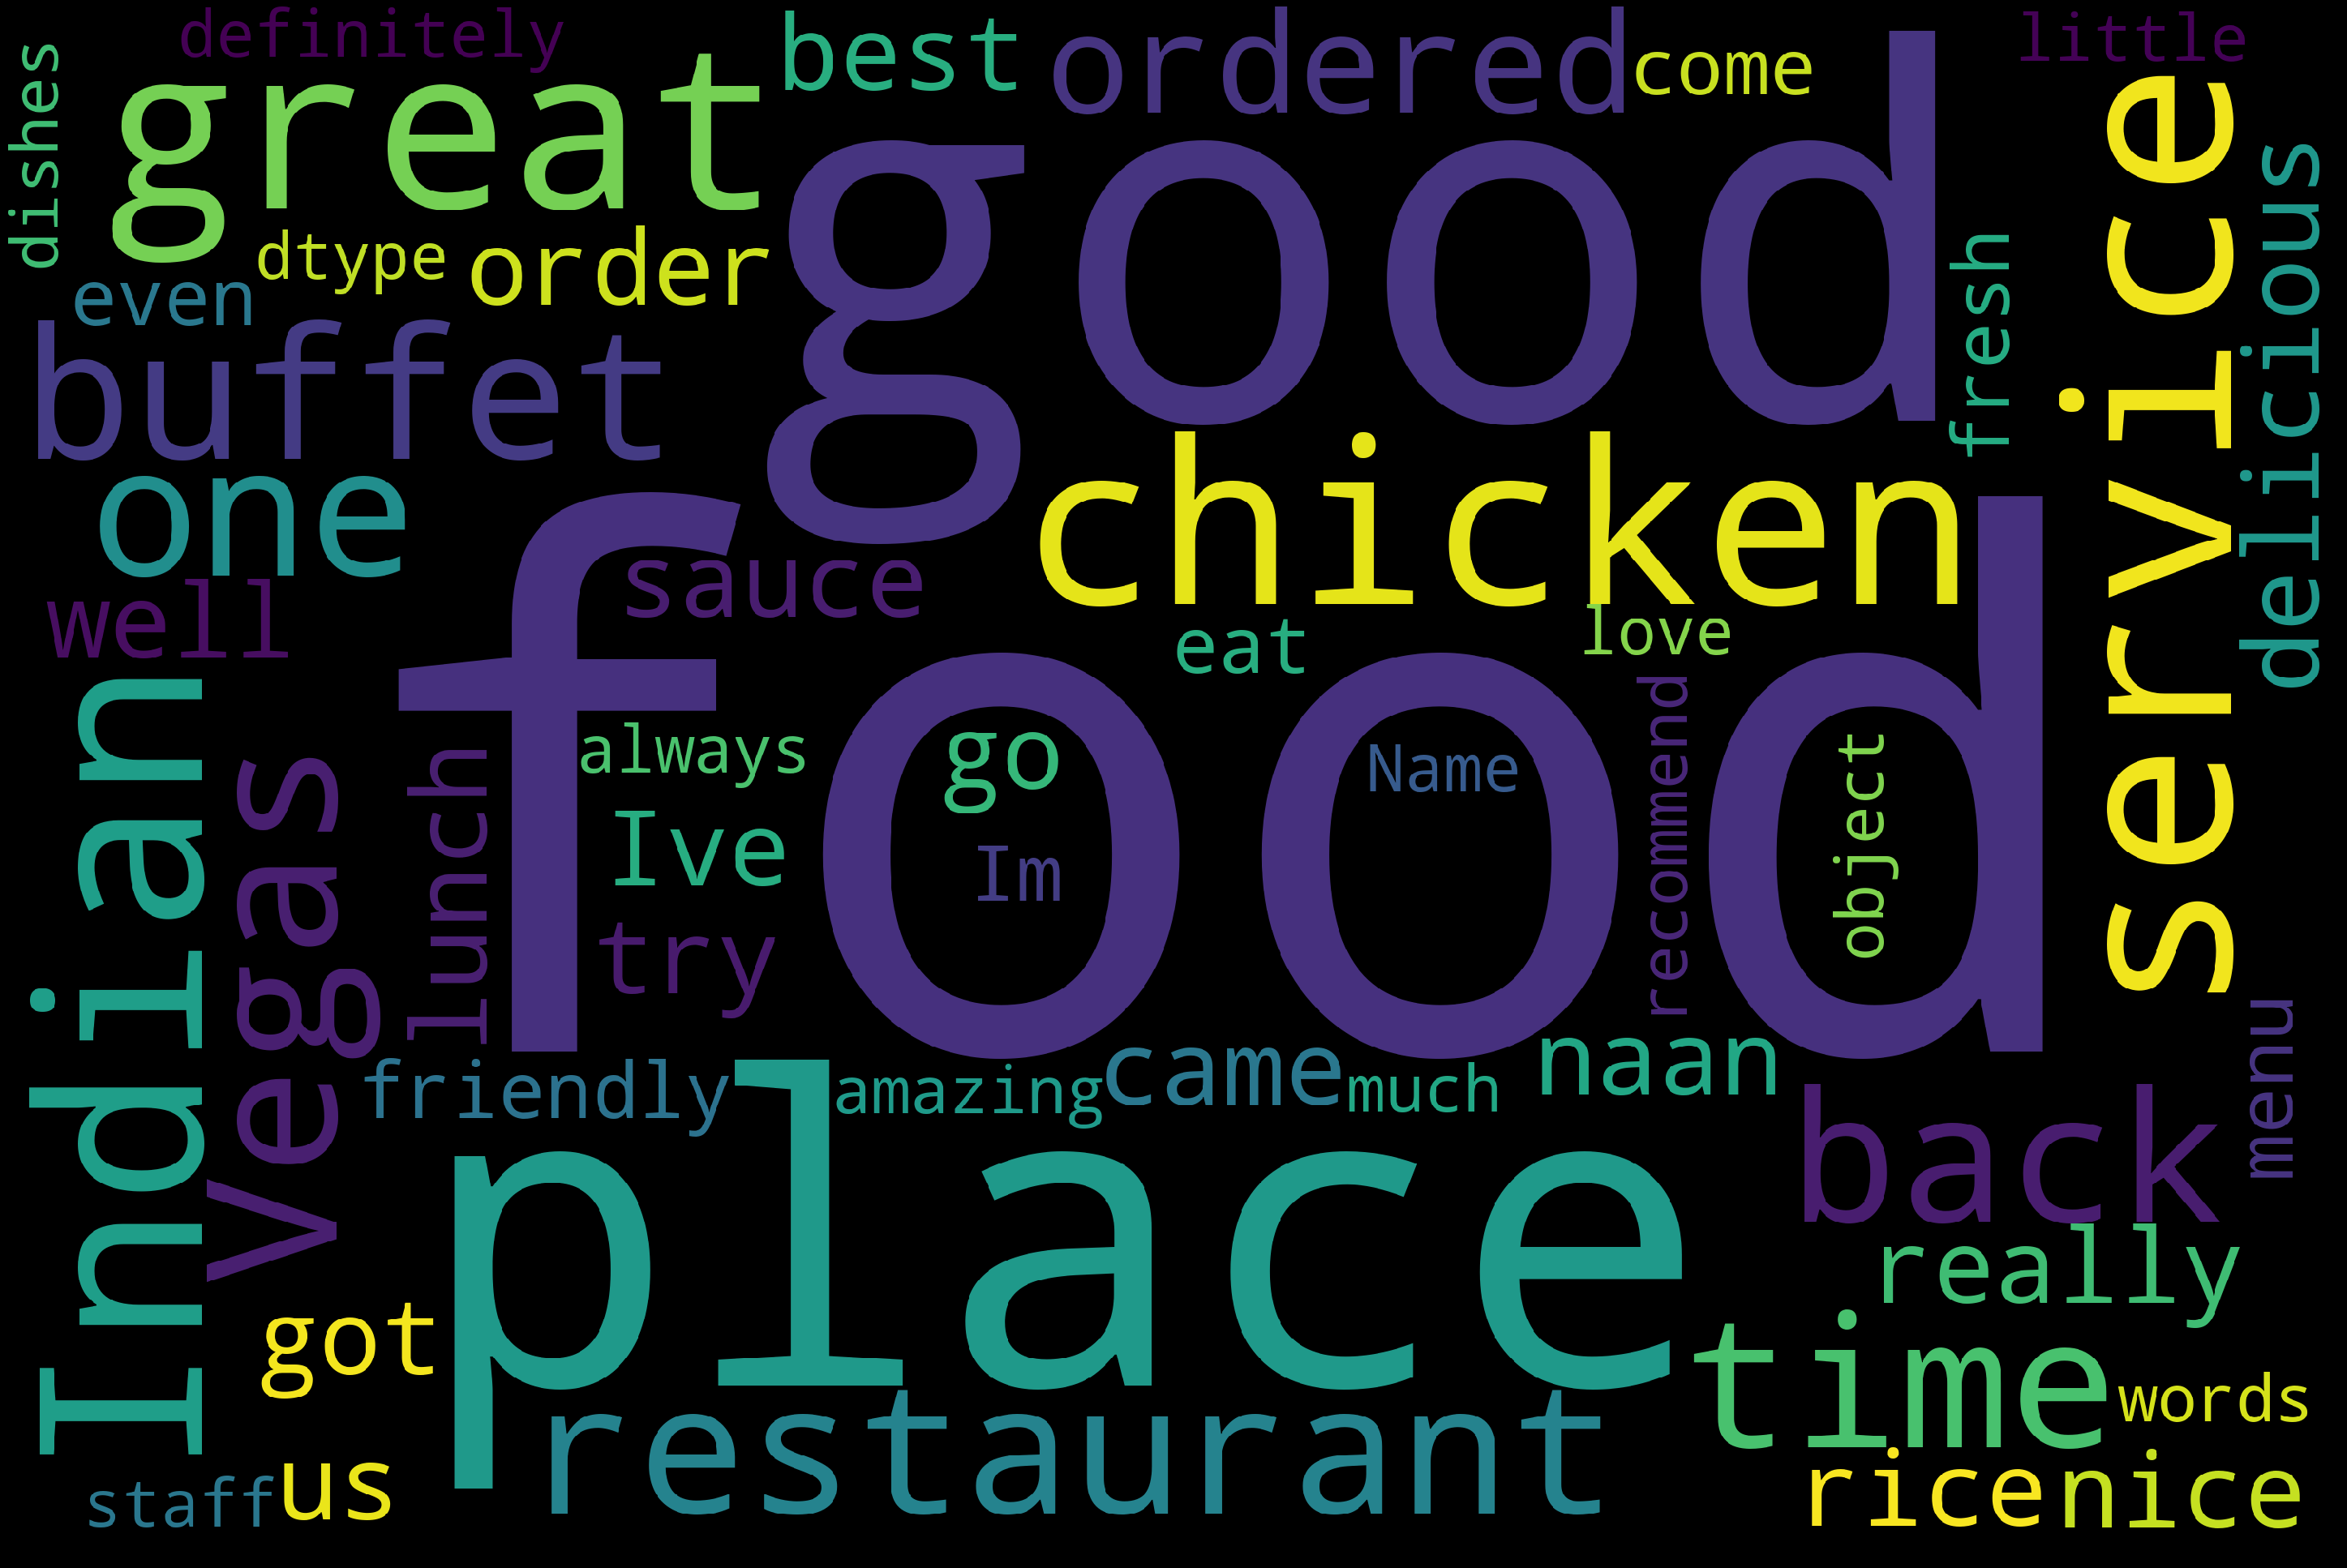

In [82]:
txt = words_count['words'].head(50)
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(txt))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'nearest')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## __>5__

In [86]:
f=[]
for i in data_df[data_df['rating']>3]['text_cleaned']:
    for j in str(i).split():
        f.append(j)
words_best_count = pd.DataFrame([pd.Series(f).value_counts().index,pd.Series(f).value_counts()]).transpose()
words_best_count = words_best_count.rename(columns={0:'words',1:'count'})

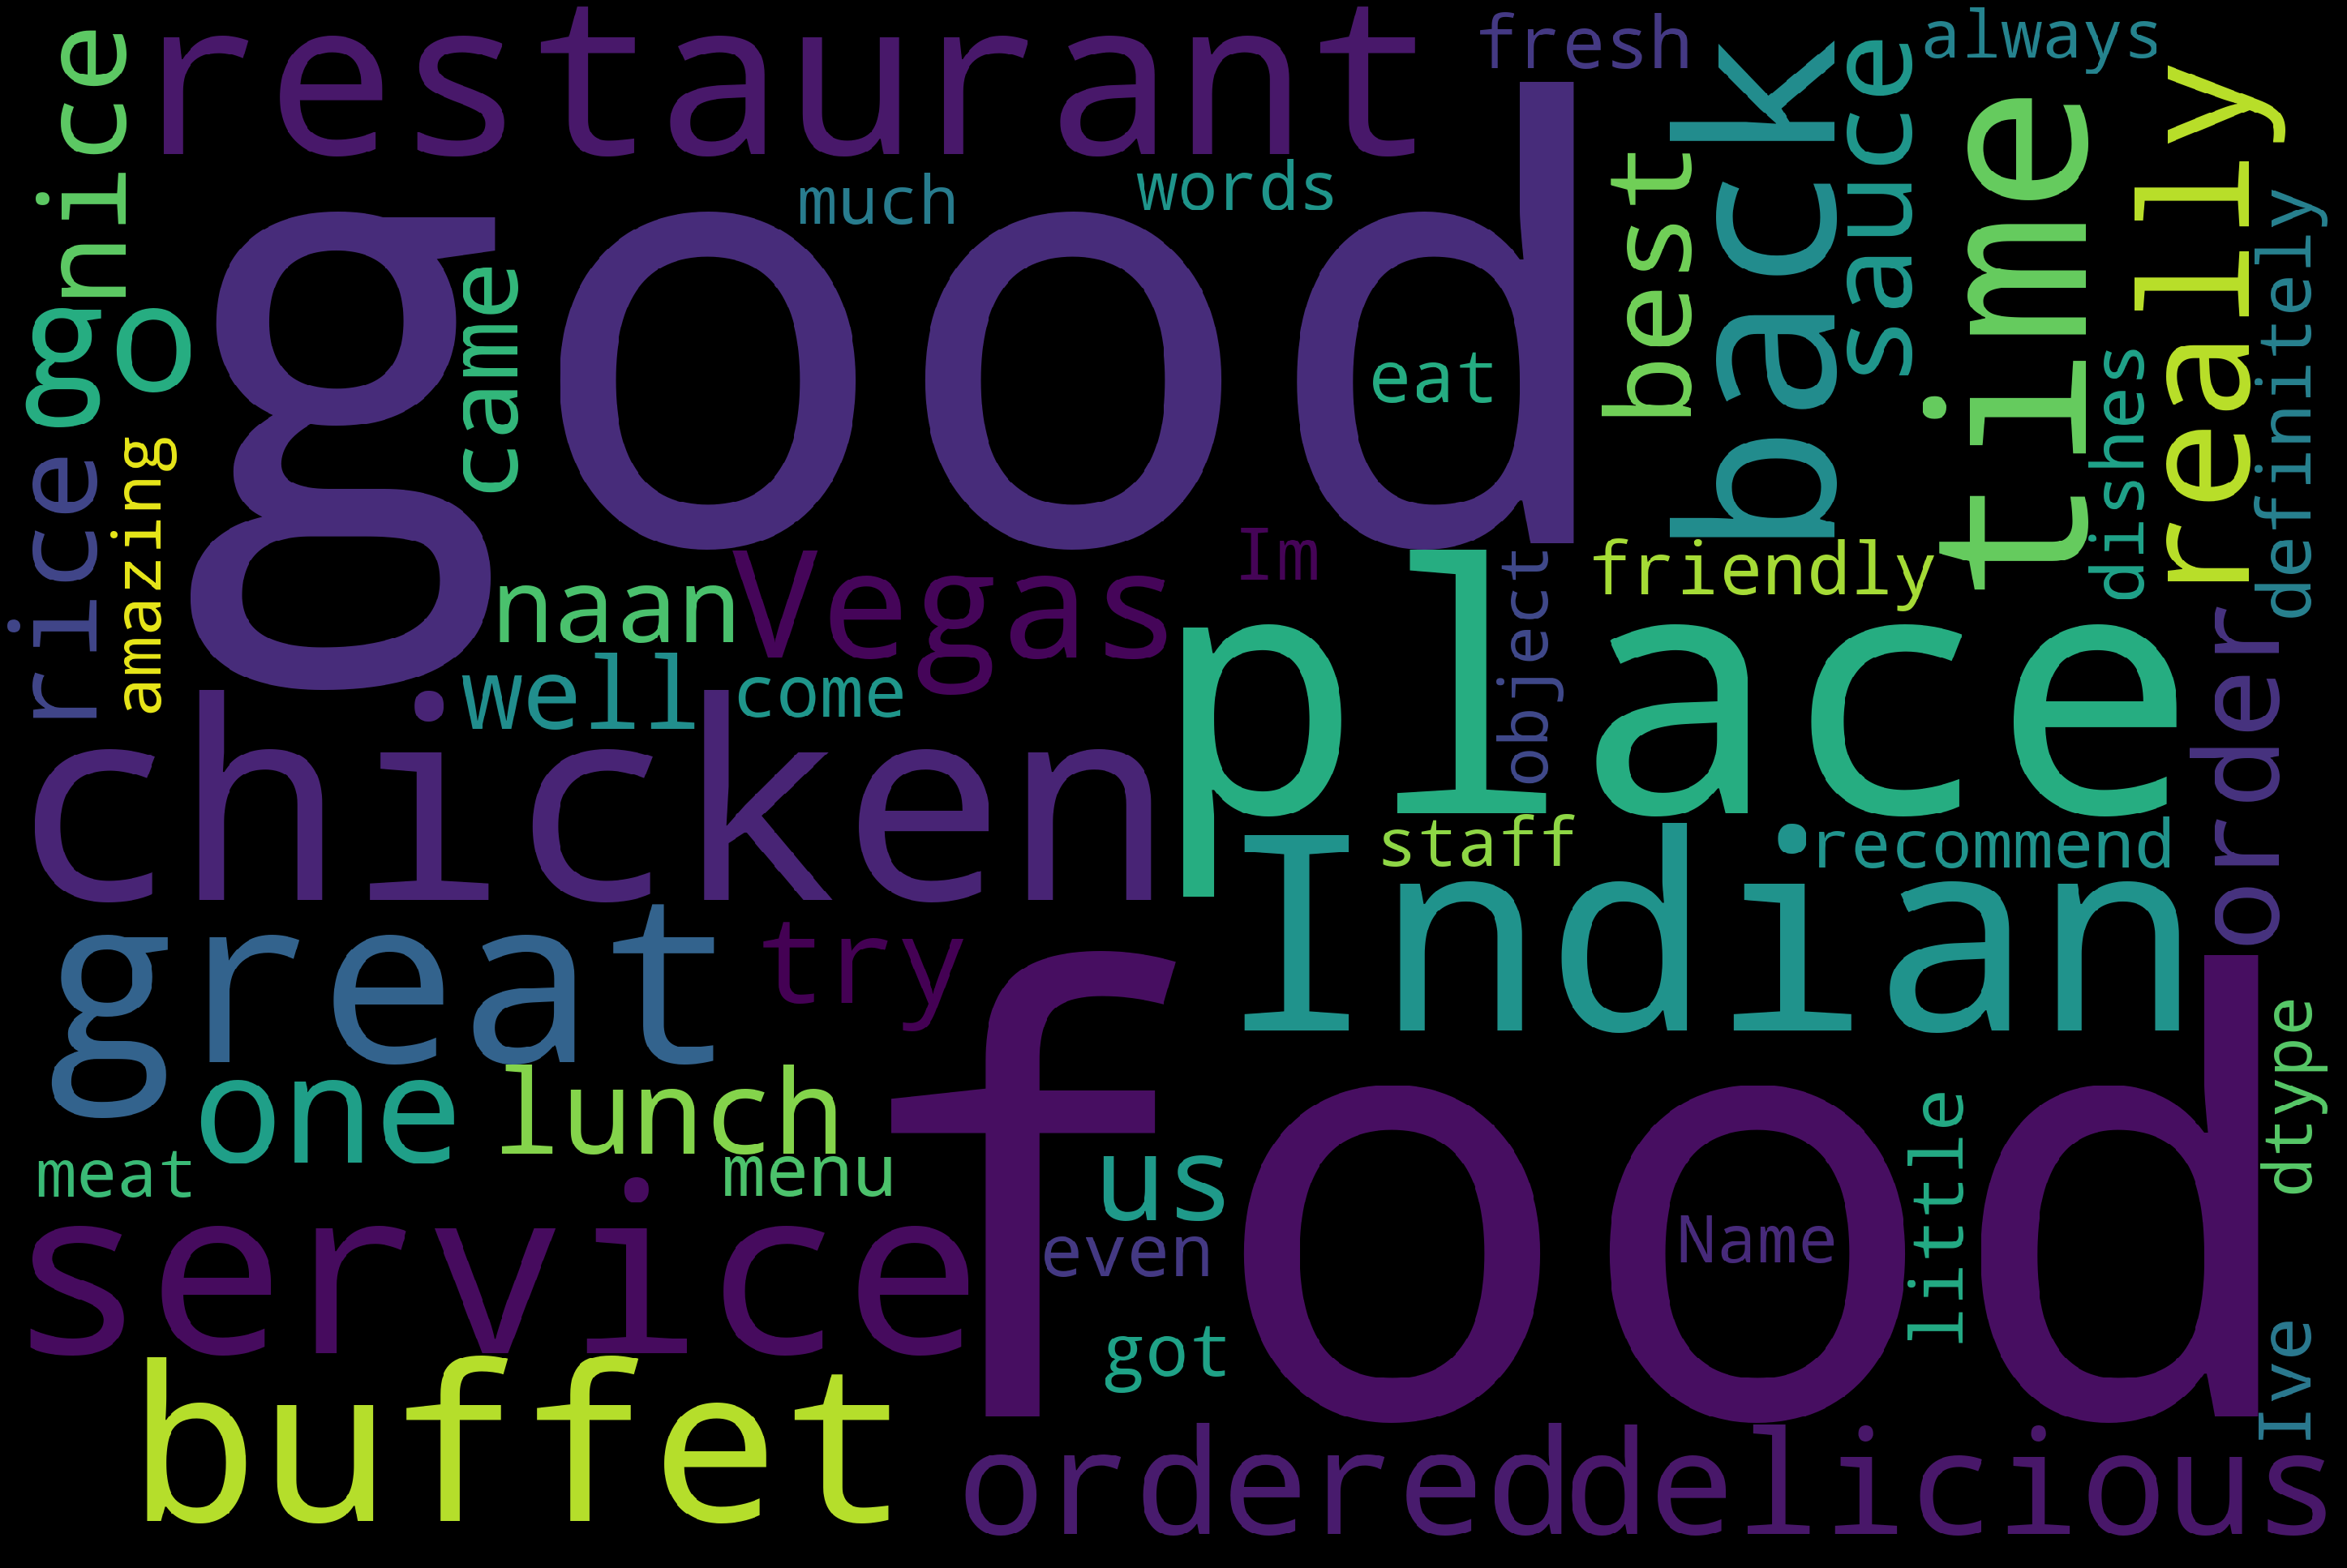

In [87]:
txt = words_best_count['words'].head(50)
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(txt))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'nearest')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [93]:
g=[]
for i in data_df[data_df['rating']<=2]['text_cleaned']:
    for j in str(i).split():
        g.append(j)
words_low_count = pd.DataFrame([pd.Series(g).value_counts().index,pd.Series(g).value_counts()]).transpose()
words_low_count = words_low_count.rename(columns={0:'words',1:'count'})

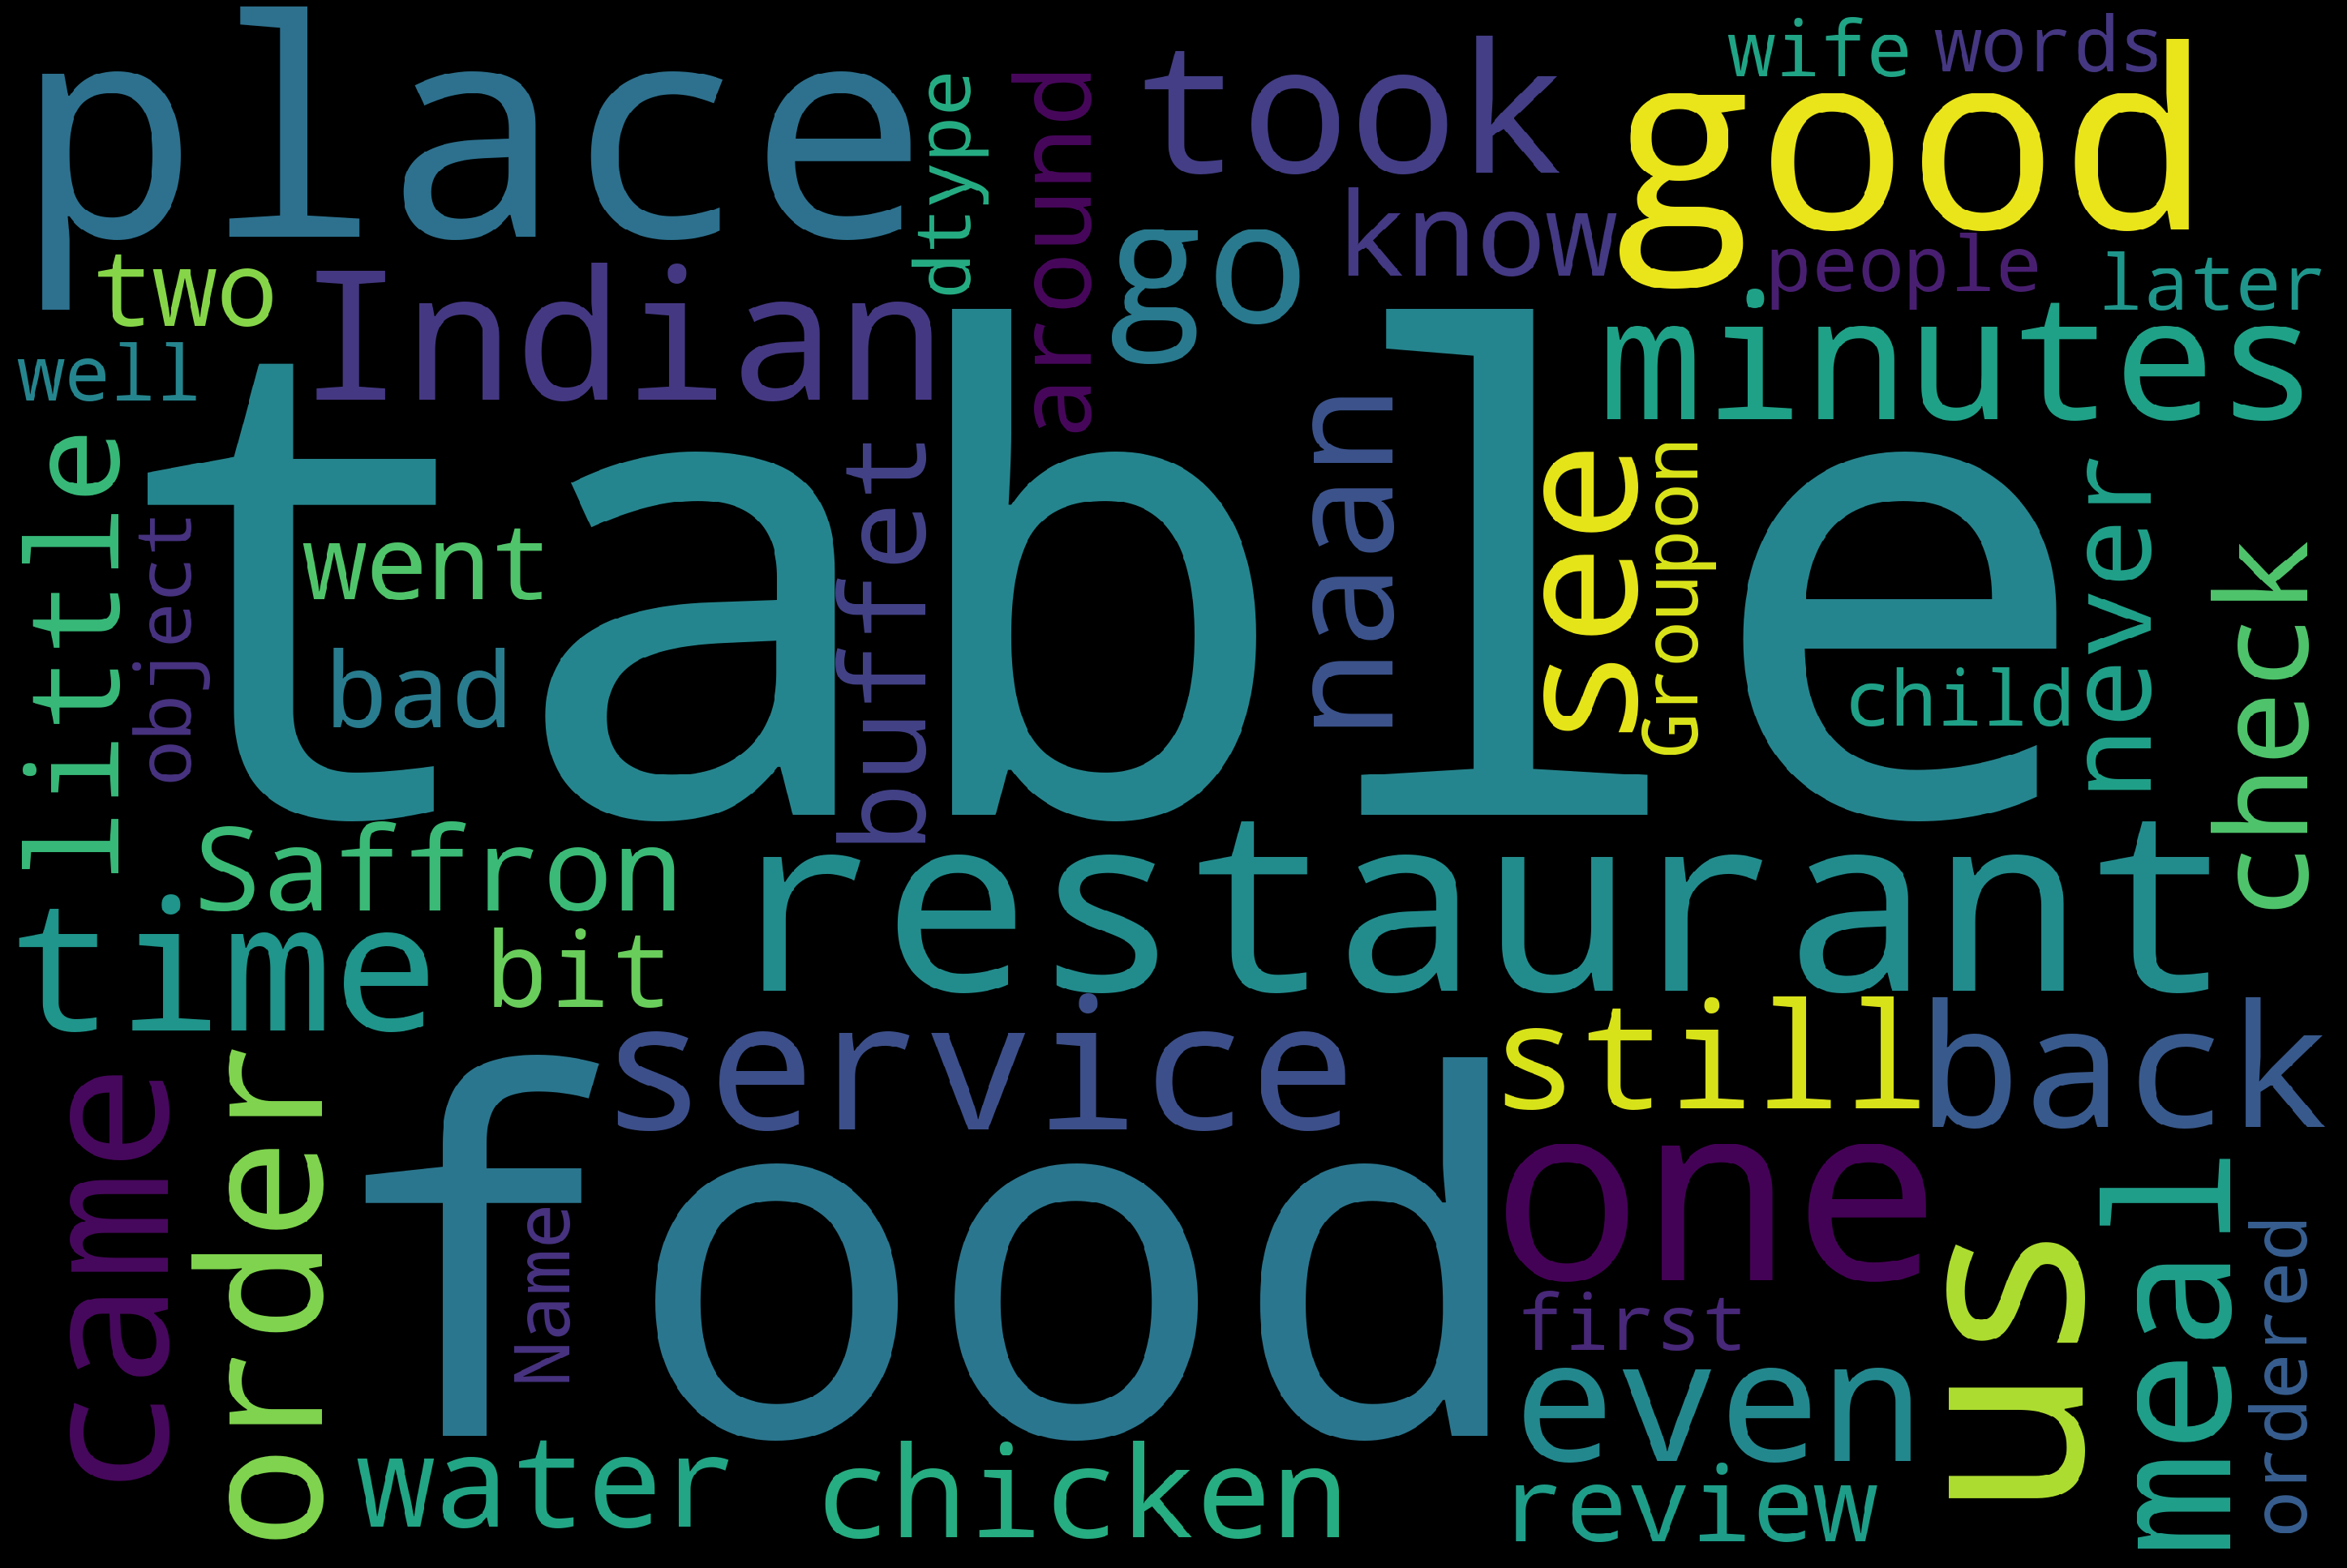

In [94]:
txt = words_low_count['words'].head(50)
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(txt))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'nearest')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [95]:
print('1000 words ' + str(words_count.head(1000).sum()['count']/words_count.sum()['count']))
print('2000 words ' + str(words_count.head(2000).sum()['count']/words_count.sum()['count']))
print('3000 words ' + str(words_count.head(3000).sum()['count']/words_count.sum()['count']))
print('4000 words ' + str(words_count.head(4000).sum()['count']/words_count.sum()['count']))
print('5000 words ' + str(words_count.head(5000).sum()['count']/words_count.sum()['count']))
print('6000 words ' + str(words_count.head(6000).sum()['count']/words_count.sum()['count']))
print('7000 words ' + str(words_count.head(7000).sum()['count']/words_count.sum()['count']))
print('8000 words ' + str(words_count.head(8000).sum()['count']/words_count.sum()['count']))
print('9000 words ' + str(words_count.head(9000).sum()['count']/words_count.sum()['count']))
print('10000 words ' + str(words_count.head(10000).sum()['count']/words_count.sum()['count']))
print('11000 words ' + str(words_count.head(11000).sum()['count']/words_count.sum()['count']))


1000 words 0.7405101668811892
2000 words 0.838297112501581
3000 words 0.8831961876985573
4000 words 0.9088142730661349
5000 words 0.9256456136957153
6000 words 0.9376799571450891
7000 words 0.9466434039893755
8000 words 0.953784029105627
9000 words 0.9593640956200198
10000 words 0.9639230099622788
11000 words 0.9676430543052074
